<a href="https://colab.research.google.com/github/DheerajVittu/HotelManagement/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/archive"

dataset-features-categories.csv  drebin-215-dataset-5560malware-9476-benign.csv


In [ ]:
import pandas as pd

dataset_path = "/content/drive/My Drive/archive/drebin-215-dataset-5560malware-9476-benign.csv"
df = pd.read_csv(dataset_path)

print(df.head())


   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3             

<ipython-input-7-522d7b5b238a>:4: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [ ]:
df.info()

print(df.isnull().sum())

print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB
transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64


KeyError: 'label'

In [ ]:
# Display all column names
print(df.columns)

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)


In [ ]:
df.info()  # This will give you a summary of the dataset including data types and non-null counts.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


In [ ]:
print(df.isnull().sum())  # This will display the number of missing values in each column.


transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64


In [ ]:
print(df['class'].value_counts())  # This will show the count of benign and malicious apps.


class
B    9476
S    5560
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

print(df['class'].value_counts())


class
0    9476
1    5560
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


ValueError: could not convert string to float: '?'

In [ ]:
# Check for non-numeric values in features
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['TelephonyManager.getSimCountryIso'], dtype='object')


In [ ]:
X.replace('?', np.nan, inplace=True)

NameError: name 'np' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Replace '?' with NaN
X.replace('?', np.nan, inplace=True)

# Option 1: Drop rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Ensure y matches the X after dropping rows

# Option 2: Fill NaN values (uncomment to use)
# X.fillna(X.mean(), inplace=True)

# Convert all features to float
X = X.astype(float)

# Now train the model



In [ ]:
import numpy as np
import pandas as pd

# Replace '?' with NaN
X.replace('?', np.nan, inplace=True)

# Option 1: Drop rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Ensure y matches the X after dropping rows

# Option 2: Fill NaN values (uncomment to use)
# X.fillna(X.mean(), inplace=True)

# Convert all features to float
X = X.astype(float)

# Now train the model
model.fit(X_train, y_train)



ValueError: could not convert string to float: '?'

In [ ]:
# Check for unique values in each column
print(X.apply(lambda col: col.unique()))


   transact  onServiceConnected  bindService  attachInterface  \
0       0.0                 0.0          0.0              0.0   
1       1.0                 1.0          1.0              1.0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                0.0                0.0       1.0   
1                1.0                1.0       0.0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                0.0                          0.0   
1                                1.0                          1.0   

   Ljava.lang.Class.cast  ...  SET_ORIENTATION  READ_CONTACTS  DEVICE_POWER  \
0                    0.0  ...              0.0            0.0           0.0   
1                    1.0  ...              1.0            1.0           1.0   

   HARDWARE_TEST  ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  \
0            0.0                0.0                     1.0   
1            1.0                1.0                     0.0   

   ACCES

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable (if you haven't defined 'y' yet)
y = df['class']  # Ensure y is the correct label column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ValueError: Found input variables with inconsistent numbers of samples: [15031, 15036]

In [ ]:
# Replace '?' with NaN again
X.replace('?', np.nan, inplace=True)

# Check for NaN values after replacement
print(X.isnull().sum())


transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
WRITE_EXTERNAL_STORAGE        0
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
Length: 215, dtype: int64


In [ ]:
X.fillna(X.mean(), inplace=True)  # Filling NaNs with column mean


In [ ]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 15031
Length of y: 15036


In [ ]:
# After cleaning X, ensure y matches the same index
if len(X) < len(y):
    y = y[X.index]  # This ensures y only contains values for the rows that remain in X


In [ ]:
print(f"Adjusted Length of X: {len(X)}")
print(f"Adjusted Length of y: {len(y)}")


Adjusted Length of X: 15031
Adjusted Length of y: 15031


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your original DataFrame
y = df['class']  # Define the target variable

# Replace '?' and clean X as before
X.replace('?', np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(inplace=True)

# Ensure y matches the index of X after dropping rows
y = y[X.index]

# Check lengths
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Length of X: 15031
Length of y: 15031


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1896
           1       0.99      0.98      0.98      1111

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007

[[1884   12]
 [  25 1086]]


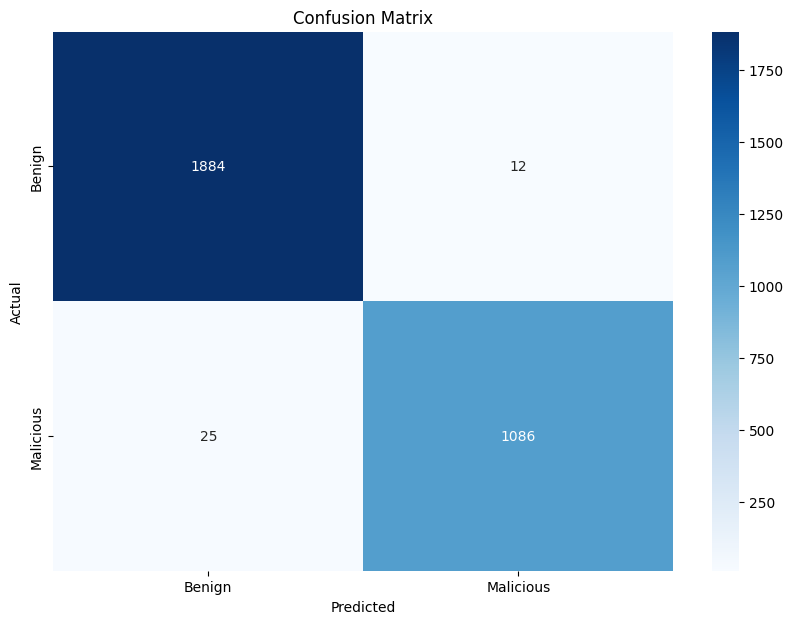

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


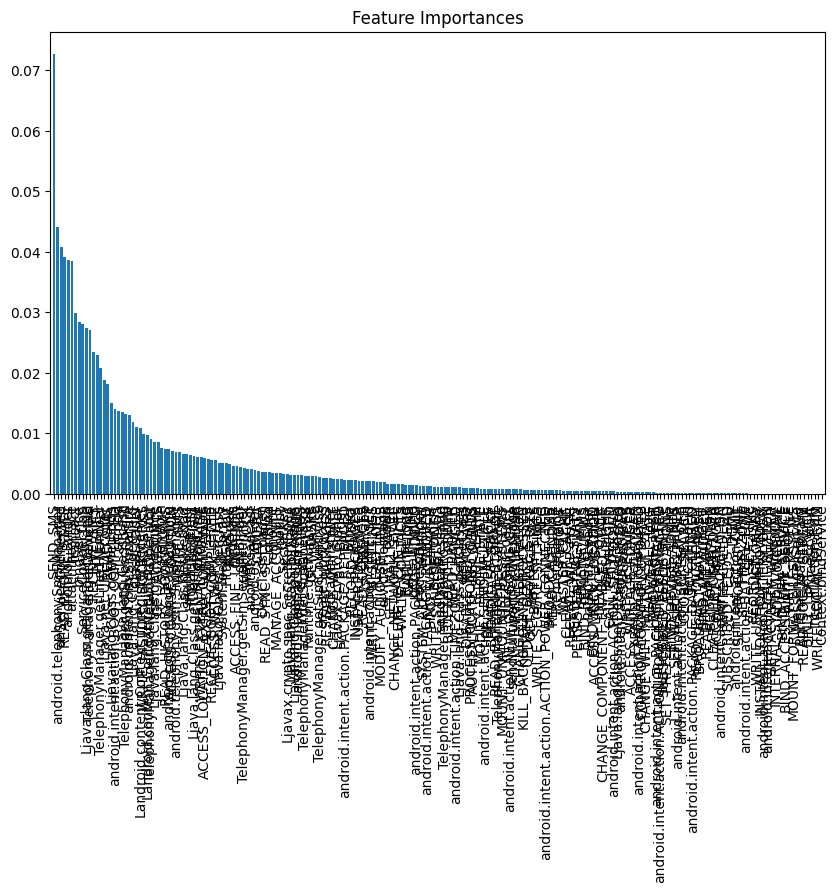

In [ ]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
